# Here, we are coding our first artificial neuron.

## Theory:

We will use a linear model. First, we initialize the parameters **W** and **b** of our model.

Then, we define an iterative algorithm that loops through the following steps:

1. **Model Function**  
   This function represents our artificial neuron's behavior. It includes the linear transformation and an activation function. Here, we use the **sigmoid activation function** to introduce non-linearity.

2. **Cost Function**  
   This function evaluates the performance of our model by comparing its output to the ground truth labels **y**. We use the **log loss** (logarithmic loss) function to measure this difference.

3. **Gradients Function**  
   This function computes the gradients of the cost with respect to the model's parameters. These gradients indicate how each parameter influences the model's error. The objective is to use this information to move the parameters in the direction that reduces the cost.

4. **Update Function**  
   This function slightly adjusts the model parameters using the previously computed gradients. The goal is to iteratively approach the optimal parameter set that minimizes the cost function.


> This is the **generic architecture** for training a neural network.  
> All neural networks in the world follow this same kind of procedure.

In [91]:
%pip install numpy matplotlib scikit-learn
# Import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

Note: you may need to restart the kernel to use updated packages.


C'est partie pour le code.

nous allons generer un dataset de 100 points. chaque point est decrit par ses coordonnes (x1, x2), et une classe lui ait attribué. Voyez pour l'instant la notion de classe comme une verite terrain.

X represente les donnes d'entrees (toutes les donnees x = (x1, x2))
y represente les donnees de reference = la verite terrain

chaque donnee x possede sa classe y.

X shape: (100, 2)
y shape: (100, 1)


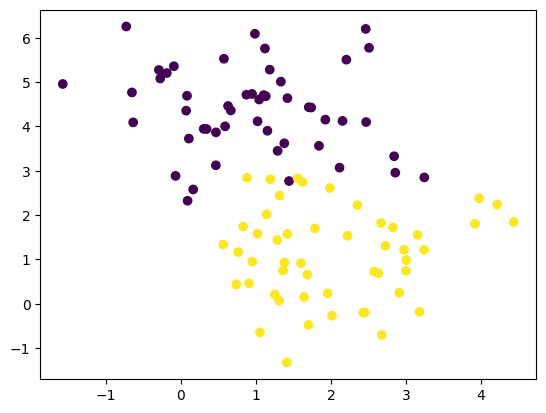

In [92]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))
# Create a scatter plot of the data
print('X shape:', X.shape)
print('y shape:', y.shape)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.show()

maintenant, on va creer la fonction initilaisation pour initialiser proprement les parantres W et b de notre models lineaire. en effet la variable d'entree x peut avoir plusieurs dimensions : x = (x1, x2, ..., xn). Il faut donc que le paraetres W s'adapte a la taille du vecteur x pour influer sur chacunes des composantes/ des dimensions de ce vecteur.

Ici, X est de dimensionion 2 car on peut representer les donnees d'entree sur 2 axes : X = (x1, x2)

In [93]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return W, b

In [94]:
W, b = initialisation(X)
# Print the shapes of W and b
print('W shape:', W.shape)
print('b shape:', b.shape)

W shape: (2, 1)
b shape: (1,)


On voit que W est bien un vecteur a 2 colonnes, et b un nombre reel.

Maintenant on va coder le modele de notre neurone. on repondre a la question : comment le neurone traduit les informations qu'il recoit ?

On choisit un modele lineaire. Le neurone traite lineairement la donnee qu'il recoit. Pour introduire de l'intelligence, on choisit une fonction d'activation du neurone non lineaire. Le neurone decide alors de s'activer ou non selon ce principe.

In [95]:
def model(X, W, b):
    Z = np.dot(X, W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [96]:
A = model(X, W, b)
print('A shape:', A.shape)


A shape: (100, 1)


on a 100 activations car 100 donnees d'entree

definissons maintenant la fonction cout : Log-Loss

In [97]:
def log_loss(A, y):
    m = len(y)
    loss = -1/m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    return loss

In [98]:
log_loss(A, y)


np.float64(0.46342046796681124)

On obtient bien un reel

maintenant occupons nous des gradients : une directtion infinitesimal vers ou aller pour minimiser la fonction cout.

In [99]:
def gradients(A, X, y):
    m = len(y)
    dZ = A - y
    dW = 1/m * np.dot(X.T, dZ)
    db = 1/m * np.sum(dZ)
    return dW, db

In [100]:
dW, db = gradients(A, X, y)
print('dW shape:', dW.shape)
print('db shape:', db.shape)

dW shape: (2, 1)
db shape: ()


Maintenant qu'on a la direction ou aller, on met a our de cette quentitte infinitesimal des parametres du models pour se rapprocher peu a peu du meilleur set de parametres (qui minismera la fonction cout).

In [101]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return W, b

Maintenant on rassemble toutes ces fonctions sur une meme architecture.

C'est la qu'on voit l'apprentissage : on donne en parametres d'entree simplement les donners X et y, rien de plus.

In [102]:
def artificial_neuron(X, y, learning_rate=0.1, num_iter=100):
    # initializer parameters
    W, b = initialisation(X)

    # error visualization : plotting the loss at each iteration
    loss = []

    for i in range(num_iter):
        A = model(X, W, b)
        loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    plt.plot(loss)
    plt.show


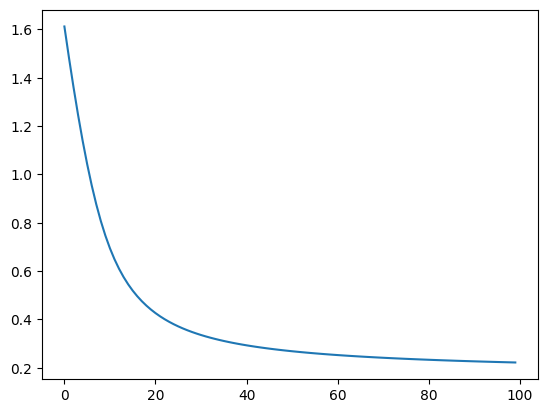

In [103]:
artificial_neuron(X, y)

On voit l'evolution des erreurs effectuer par le modele en fonction des iterations : c'est la courbe d'apprentissage

Nous avons maintenant un modele de neurone artificiels : on peut s'en servir pour faire des predictions

Mais en fait, tout est deja la pour faire le prediction.

Imaginez que vous voulez savoir si une plante est toxique. On va se servir de la largeur et de la longeueur de ses feuilles. On a un dataset de valeurs (largeur/longueur) et la toxicite de la plante associee pour chaque point. On va entrainer notre neurone artificiel a apprendre de ces donnees, pour faire en sorte a ce que, si on rajoute un point dans le dataset mais cette fois ci sans savoir si la plante est toxique ou non, le modele predise si la plante l'est ou non avec une certaine probabilite.

Pour faire ceci, il faut une fonction de prediction. Si la probabilite que la plante soit toxique est superieur a 50%, alors en renvoit True, sinon False. Pour voir a quel point le modele est juste, il nous faut une mesure d'exctactitude

In [104]:
def predict(X, W, b):
    A = model(X, W, b)
    return A >= 0.5

In [105]:
from sklearn.metrics import accuracy_score

Maintenant on reprend la modele du neurone artificiel code avant, et on regarde ce que le modele avait predit pour les 100 valeurs y precedentes

In [112]:
def artificial_neuron(X, y, learning_rate=0.1, num_iter=100):
    # initializer parameters
    W, b = initialisation(X)

    # error visualization : plotting the loss at each iteration
    loss = []

    for i in range(num_iter):
        A = model(X, W, b)
        loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    print('accuracy score :', accuracy_score(y, y_pred))

    plt.plot(loss)
    plt.show

accuracy score : 0.87


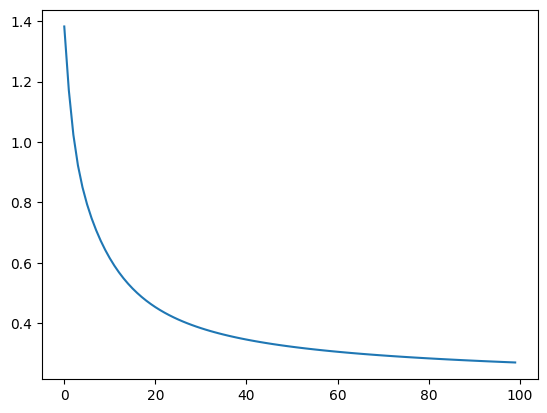

In [113]:
artificial_neuron(X, y)

Vous avez accuracy_score = 0.92, ou bien 0.86 par exemple.

Ca veut dire que dans 86% des cas, le neurone a reussi a predire la bonne classe, ie a predire si la plante, en fonction de la largeur/longeur de ses feuilles etait toxique (True) ou non (False).